# Well Functionality in Tanzania


# Business problem

Access to clean and safe drinking water remains a critical challenge in Tanzania. While many water wells have been installed, many are failing or in need of urgent repair. This has lead to water scarcity, health risks, and inefficient resource allocation for maintenance and repairs.

# Problem Statement
The government of Tanzania lack an efficient system to predict which water wells are likely to fail. The goal is to predict the operating condition of a waterpoint for each record in the dataset.

# Stakeholders

* Government of Tanzania
* NGOs and Internantional Organizations  such as WaterAid or UNICEF can use insights to fund well rehabilitation projects.
* Community water Committes

# Business Objectives
1. Develop a model that accurately predicts the functionality status of a well(functional, needs repair, non-functional)
2. Identify the most important features influencing well functionality.
3. Improve prediction accuracy through data preprocessing techniques for optimal model perfomance.
4. Model optimization by potentially using ensemble methods to enhance ability to predict well functionality.

# Data Understanding

## Load the dataset
Here there's loading of three datasets



In [1]:
!pip install catboost

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb



In [3]:
#loading the datasets
training_set_labels = pd.read_csv('Training set labels.csv')

training_set_values = pd.read_csv('Training set values.csv')

test_set_values = pd.read_csv('test set values.csv')


In [4]:
#diplay the dataset
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:

test_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


## Data exploration

Here we explore the various details of the different datasets such seeing the shape, missing values and provides a summary of the data using describe() and info() methods.


In [6]:
test_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [7]:
training_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
training_set_labels.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [9]:
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [10]:
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [11]:
test_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [12]:
#looking for missing values
test_set_values.isnull().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,870
gps_height,0
installer,877
longitude,0
latitude,0
wpt_name,0
num_private,0


In [13]:
training_set_values.isnull().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [14]:
training_set_labels.isnull().sum()

,0
id,0
status_group,0


In [15]:
#merging the two datasets
df_train = pd.merge(training_set_values, training_set_labels, on= 'id')
print(f"Shape of df_train: {df_train.shape}")
display(df_train.head())

Shape of df_train: (59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


We then merge the two datasets which are the training_set_values and training_set_labels on the id column to create a combined dataset.(df_train)


## Handling missing values

Here we clean the df_train and test_set_values DataFrames by handling missing values and removing irrelevant columns.

## Cleaning dataset

Here there analysis of the distribution of the various numerical features in the dataframes.

In [16]:
# Analyze the distribution of numerical features in df_train
print("\nDistribution of numerical features in df_train:")
display(test_set_values.describe())

# Analyze the distribution of categorical features in df_train
print("\nDistribution of categorical features in df_train:")
categorical_cols = test_set_values.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nDistribution of '{col}':")
    print(test_set_values[col].value_counts())


Distribution of numerical features in df_train:


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000



Distribution of categorical features in df_train:

Distribution of 'date_recorded':
date_recorded
2013-02-03    138
2011-03-16    137
2011-03-17    137
2011-03-18    130
2011-03-14    129
             ... 
2011-09-24      1
2004-01-04      1
2013-01-06      1
2011-09-02      1
2004-01-09      1
Name: count, Length: 331, dtype: int64

Distribution of 'funder':
funder
Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Craelius                     1
Tanroad                      1
Ndanda Missions              1
Wards                        1
Livin                        1
Name: count, Length: 979, dtype: int64

Distribution of 'installer':
installer
DWE           4349
Government     457
RWE            292
Commu          287
DANIDA         255
              ... 
Commun           1
QUIKWIN          1
SDG              1
MoWI             1
LIVI             1
N

In [17]:
train_data = df_train.copy()
test_data = test_set_values.copy()

In [18]:

def clean_data(df):
    """Cleans dataset by dropping redundant columns and handling missing values."""

    # Drop redundant columns
    columns_to_drop = [
        "wpt_name","region_code", "extraction_type_group", "management_group", "source_group" ,"extraction_type_class", "payment_type",
        "waterpoint_type_group", "scheme_name", "subvillage",
        "recorded_by", "num_private","amount_tsh", "quantity_group", "source_class", "quality_group"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Fill missing values for binary categorical columns (True/False) with mode
    mode_fill_cols = ['public_meeting', 'permit']
    for col in mode_fill_cols:
        if col in df.columns:
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)

    # Fill missing values for categorical columns with 'unknown'
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('unknown')

    # Explicitly convert categorical columns back to object type (Fix for warning)
    df[categorical_cols] = df[categorical_cols].astype(str)

    # Fill missing values for numerical columns with median
    numerical_cols = df.select_dtypes(include=['number']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    return df

# Clean the train and test data
train_data = clean_data(train_data)
test_data = clean_data(test_data)

# Verify
train_data.head()


<ipython-input-18-2fe912952067>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)
<ipython-input-18-2fe912952067>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)


,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_type,waterpoint_type,status_group
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,1999,gravity,vwc,pay annually,soft,enough,spring,spring,communal standpipe,functional
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,...,2009,gravity,vwc,pay per bucket,soft,enough,dam,dam,communal standpipe multiple,functional
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,1986,submersible,vwc,never pay,soft,dry,machine dbh,borehole,communal standpipe multiple,non functional
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,communal standpipe,functional


In [19]:
test_data.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_type,waterpoint_type
0,50785,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Internal,Manyara,3,...,True,2012,other,parastatal,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,other
1,51630,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Pangani,Arusha,2,...,True,2000,gravity,vwc,never pay,soft,insufficient,spring,spring,communal standpipe
2,17168,2013-02-01,unknown,1567,unknown,34.767863,-5.004344,Internal,Singida,2,...,True,2010,other,vwc,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,other
3,45559,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,43,...,True,1987,other,vwc,unknown,soft,dry,shallow well,shallow well,other
4,49871,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,3,...,True,2000,gravity,water board,pay monthly,soft,enough,spring,spring,communal standpipe


In [20]:
import pandas as pd

# Assuming you have your data in train_data DataFrame

# Get unique values for each column
installer_values = train_data['installer'].unique()
funder_values = train_data['funder'].unique()

# Find common values
common_values = set(installer_values) & set(funder_values)

# Print the common values
print("Common values between installer and funder:", common_values)

Common values between installer and funder: {'Laramatak', 'Africa', 'Hans', 'M', 'Natio', 'Villege Council', 'Serikari', 'Carmatech', 'Manyovu Agriculture Institute', 'Redep', 'Sophia Wazir', 'St Magreth Church', 'Kata', 'Mbunge', 'Mbozi District Council', 'Warento', 'Serikali', 'Pr', 'Wilson', 'Huches', 'College', 'Charlotte Well', 'Mzung', 'Kibaha Town Council', 'Madra', 'Plan Int', 'Church Of Disciples', 'Mwanamisi Ally', 'Village Community', 'Internal Drainage Basin', 'Rural', 'Conce', 'Schoo', 'Kwasenenge Group', 'Norad', 'Overland High School', 'Kanisani', 'Mwamvita Rajabu', 'Othod', 'Kilol', 'Kizenga', 'I.E.C', 'Pankrasi', 'Magani', 'Msudi', 'Bao', 'Mamvua Kakungu', 'Village Council', 'Nchagwa', 'Mambe', 'Raramataki', 'Kinga', 'Said Omari', 'Nyabweta', 'Nyabarongo Kegoro', 'Kahema', 'Winkyens', 'Maro', 'Plan Tanzania', 'Kidika', 'Chacha', 'Songas', 'Mosque', 'Dawasco', 'Socie', 'Steven Nyangarika', 'Village', 'Kanamama', 'Water', 'Paskali', 'Mwita Muremi', 'Gtz', 'Rombo Dalta', 

In [21]:
#check for duplicates

def check_duplicates(df):
    """Checks for duplicate rows in the dataset and prints the count."""
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")

    return  duplicate_count

# verify results
duplicates = check_duplicates(train_data)
duplicate = check_duplicates(test_data)


Number of duplicate rows: 0
Number of duplicate rows: 0


## Data wrangling

In [22]:
train_data.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_type,waterpoint_type,status_group
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,1999,gravity,vwc,pay annually,soft,enough,spring,spring,communal standpipe,functional
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,communal standpipe,functional
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,...,2009,gravity,vwc,pay per bucket,soft,enough,dam,dam,communal standpipe multiple,functional
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,1986,submersible,vwc,never pay,soft,dry,machine dbh,borehole,communal standpipe multiple,non functional
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,communal standpipe,functional


In [23]:
# Analyze the construction_year column using value_counts
construction_year_counts = train_data['construction_year'].value_counts()

print(construction_year_counts)

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64


In [24]:
# Analyze the construction_year column using value_counts
construction_year_counts = test_data['construction_year'].value_counts()

print(construction_year_counts)

construction_year
0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
Name: count, dtype: int64


In [25]:
def replace_zero_with_median(df):
    """Replaces 0 values in the 'construction_year' column with the median."""

    # Calculate the median of the 'construction_year' column, ignoring zeros
    median_year = df['construction_year'][df['construction_year'] != 0].median()

    # Replace 0 values with the calculated median
    df['construction_year'] = df['construction_year'].replace(0, median_year)

    return df

# Example usage:
train_data = replace_zero_with_median(train_data)
test_data = replace_zero_with_median(test_data)

# Verify the results
print(train_data['construction_year'].unique())
print(test_data['construction_year'].unique())

[1999 2010 2009 1986 2000 2011 1987 1991 1978 1992 2008 1974 2002 2004
 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012 1996
 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963 1971
 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]
[2012 2000 2010 1987 1990 2007 1982 1997 2003 2006 2002 1984 1989 1978
 2008 2005 1970 2009 1998 1971 1972 1983 1974 1992 1999 2004 2011 1988
 1962 1986 1985 1969 1996 1994 1960 1975 1981 1995 1963 1977 2001 1993
 1991 1976 1980 2013 1979 1967 1973 1968 1965 1961 1966 1964]


In [26]:
# function for processing years and calculating years
def process_date_and_years(df):

    df['date_recorded'] = pd.to_datetime(df['date_recorded'])
    df['recorded_year'] = df['date_recorded'].dt.year
    df['years_in_existence'] = df['recorded_year'] - df['construction_year']
    return df

# Process both DataFrames
train_data = process_date_and_years(train_data)
test_data = process_date_and_years(test_data)

# Calculate year_counts for train_data (you might want to do this for test_data as well)
year_counts = train_data['recorded_year'].value_counts()

print(year_counts)
print(train_data['recorded_year'].unique())

recorded_year
2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: count, dtype: int64
[2011 2013 2012 2004 2002]


In [27]:
train_data.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,management,payment,water_quality,quantity,source,source_type,waterpoint_type,status_group,recorded_year,years_in_existence
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,vwc,pay annually,soft,enough,spring,spring,communal standpipe,functional,2011,12
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,wug,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,communal standpipe,functional,2013,3
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,...,vwc,pay per bucket,soft,enough,dam,dam,communal standpipe multiple,functional,2013,4
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,vwc,never pay,soft,dry,machine dbh,borehole,communal standpipe multiple,non functional,2013,27
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,communal standpipe,functional,2011,11


In [28]:
# Display unique values and value counts for numeric columns in train_data
for col in train_data.select_dtypes(include=np.number).columns:
    print(f"Column: {col}")
    print(f"Unique values: {train_data[col].unique()}")
    print(f"Value counts:\n{train_data[col].value_counts()}\n")

# Display unique values and value counts for numeric columns in test_data
for col in test_data.select_dtypes(include=np.number).columns:
    print(f"Column: {col}")
    print(f"Unique values: {test_data[col].unique()}")
    print(f"Value counts:\n{test_data[col].value_counts()}\n")


Column: id
Unique values: [69572  8776 34310 ... 37057 31282 26348]
Value counts:
id
69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: count, Length: 59400, dtype: int64

Column: gps_height
Unique values: [1390 1399  686 ...  -90 2091 2366]
Value counts:
gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: count, Length: 2428, dtype: int64

Column: longitude
Unique values: [34.93809275 34.6987661  37.46066446 ... 34.01708706 35.86131531
 38.10404822]
Value counts:
longitude
0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: count, Length: 57516, dtype: int64

Column: latitude
Unique values: [-9.85632177 -2.14746569 -3.82132853 ... -8

In [29]:
region_counts = train_data[train_data["population"] == 0]["region"].value_counts()
print(region_counts)


region
Shinyanga    4818
Mbeya        4639
Kagera       3316
Mwanza       2735
Dodoma       2201
Tabora       1959
Iringa       1164
Ruvuma        467
Rukwa          47
Kigoma         31
Singida         2
Arusha          1
Pwani           1
Name: count, dtype: int64


In [30]:
# Replaces zero values in specified columns with the median of their respective regions.
def impute_zero_with_median(df, columns, groupby_col="region"):
    for col in columns:
        median_values = df.groupby(groupby_col)[col].median()  # Compute medians
        df[col] = df.apply(lambda row: median_values[row[groupby_col]] if row[col] == 0 else row[col], axis=1)
    return df

# Apply function
train_data = impute_zero_with_median(train_data, ["gps_height", "population"])


In [31]:
train_data.isna().sum()

,0
id,0
date_recorded,0
funder,0
gps_height,0
installer,0
longitude,0
latitude,0
basin,0
region,0
district_code,0


In [32]:
#select only numeric columns
numerical_cols = train_data.select_dtypes(include = ['int', 'float64'])
# Calculate skewness
skew_values = numerical_cols.skew()

# Display skewness values
print(skew_values)


id                     0.002623
gps_height             0.461171
longitude             -4.191046
latitude              -0.152037
district_code          3.962045
population            12.689631
construction_year     -1.194164
recorded_year         -0.150980
years_in_existence     1.238555
dtype: float64


In [33]:
# Create copies for visualization
train_data_viz = df_train.copy()
test_data_viz = test_set_values.copy()


# Combine visualization copies and export for Tableau IMMEDIATELY
cleaned_df_viz = pd.concat([train_data_viz, test_data_viz], ignore_index=True)
cleaned_df_viz['data_source'] = ['train'] * len(train_data_viz) + ['test'] * len(test_data_viz)
cleaned_df_viz.to_csv('cleaned_dataset_viz.csv', index=False)

 Duplicate handling by checking for duplicate rows in the train and test datasets using `check_duplicates` function.

Feature Engineering:  Addresses the 'construction_year' column by replacing zero values with the median.
* Processes 'date_recorded' to extract the year and create a new feature "years_in_existence".

 Handling Zeros and Missing Values:

 -  Identifies and imputes zero values for "gps_height" and "population" columns based on regional medians using `impute_zero_with_median` and `impute_missing_values` functions, addressing potential NaNs introduced during the process.
- Checks for skewness in numerical columns.
Finally - Data Export for Visualization:
- Creates copies of the original and processed dataframes and combines them for visualization in Tableau.
- Exports the combined dataset as "cleaned_dataset_viz.csv".


## EDA

## Univariate Analysis

## Bar Chart of status_group

This is crucial for seeing the distribution of each well status (functional, needs repair, non-functional). It helps understand class imbalance and if you need to use oversampling or undersampling techniques.

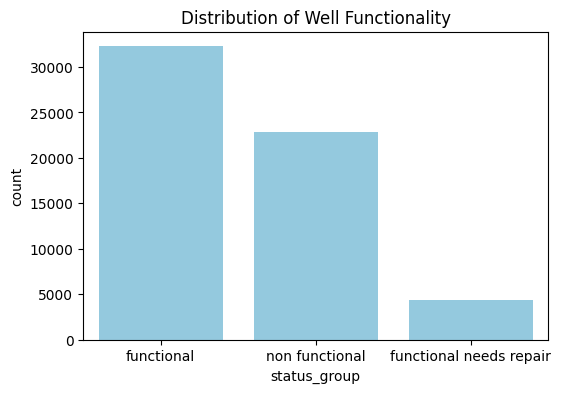

In [34]:
#Distribution of the status_group
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=train_data["status_group"], color="skyblue")
plt.title("Distribution of Well Functionality")
plt.show()

The bar chart displays the distribution of well functionality. There is imbalance in the classes whereby there are far more functional wells than non-functional or repair needed wells.

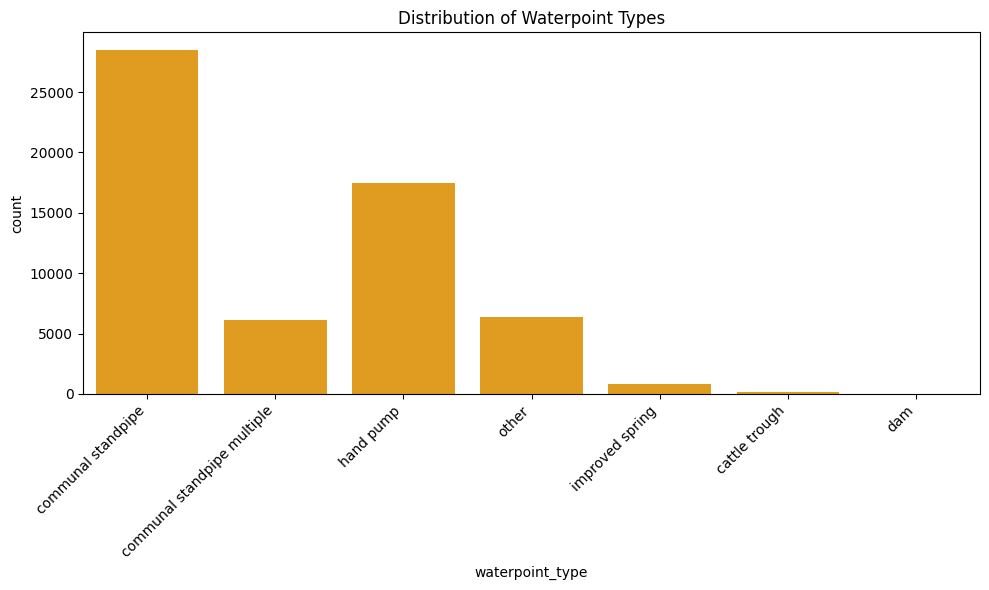

In [35]:
#plot distribution of waterpoint types
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['waterpoint_type'], color="orange")
plt.title("Distribution of Waterpoint Types")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Communal standpipes are the most common waterpoint type, with the highest count.
* Hand pumps are also widely used but not as common as communal standpipes.
* Other categories, such as improved springs, cattle troughs, and dams, have very few occurrences.


Possible Implications:

Since communal standpipes and hand pumps dominate, they may have a bigger influence on well functionality.
The rare categories (e.g., dams and cattle troughs) may have limited data, which could make it harder for the model to learn patterns for those waterpoints.

## Correlation Analysis

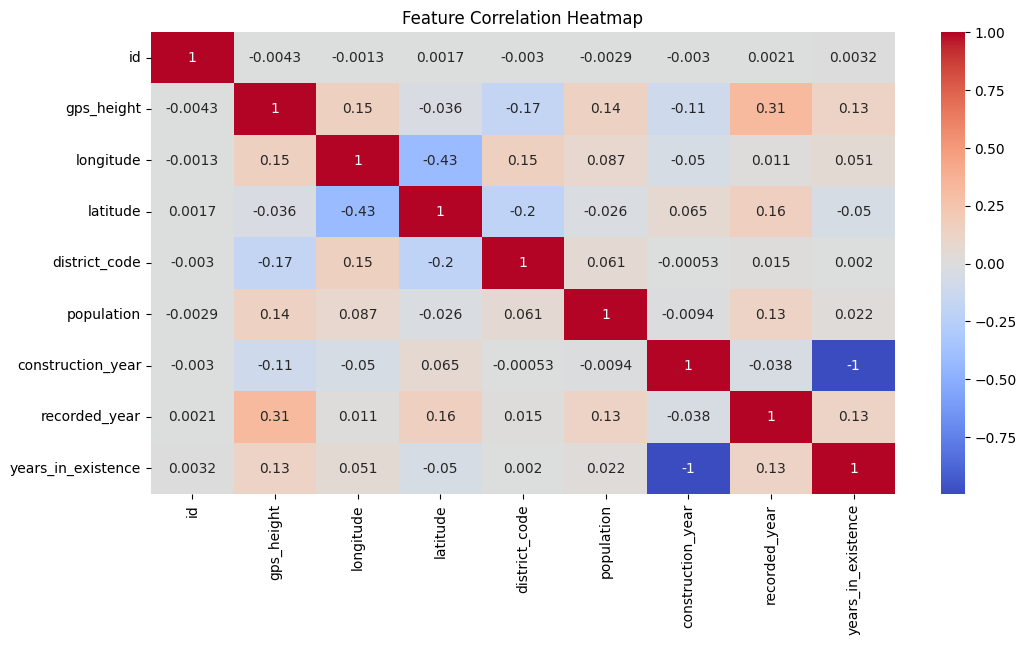

In [36]:
# Select only numeric columns for correlation calculation
numerical_train_data = train_data.select_dtypes(include=['int', 'float64'])

#Checking Correlations
plt.figure(figsize=(12,6))
sns.heatmap(numerical_train_data.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


Strong Negative Correlations:

* construction_year and years_in_existence (-1.0): This is expected since years_in_existence is derived from recorded_year - construction_year.

* latitude and longitude (-0.43): This suggests an inverse spatial relationship in your data.
Moderate Positive Correlations:

* gps_height and latitude (0.31): Higher latitudes tend to have higher elevations.
recorded_year and latitude (0.16): Slight correlation, possibly indicating data collection trends in different regions.

Weak or No Correlation:

* Most other features, including population, district_code, and gps_height, show very weak correlations with other variables, meaning they vary independently.

## Distribution of numerical features through box plot

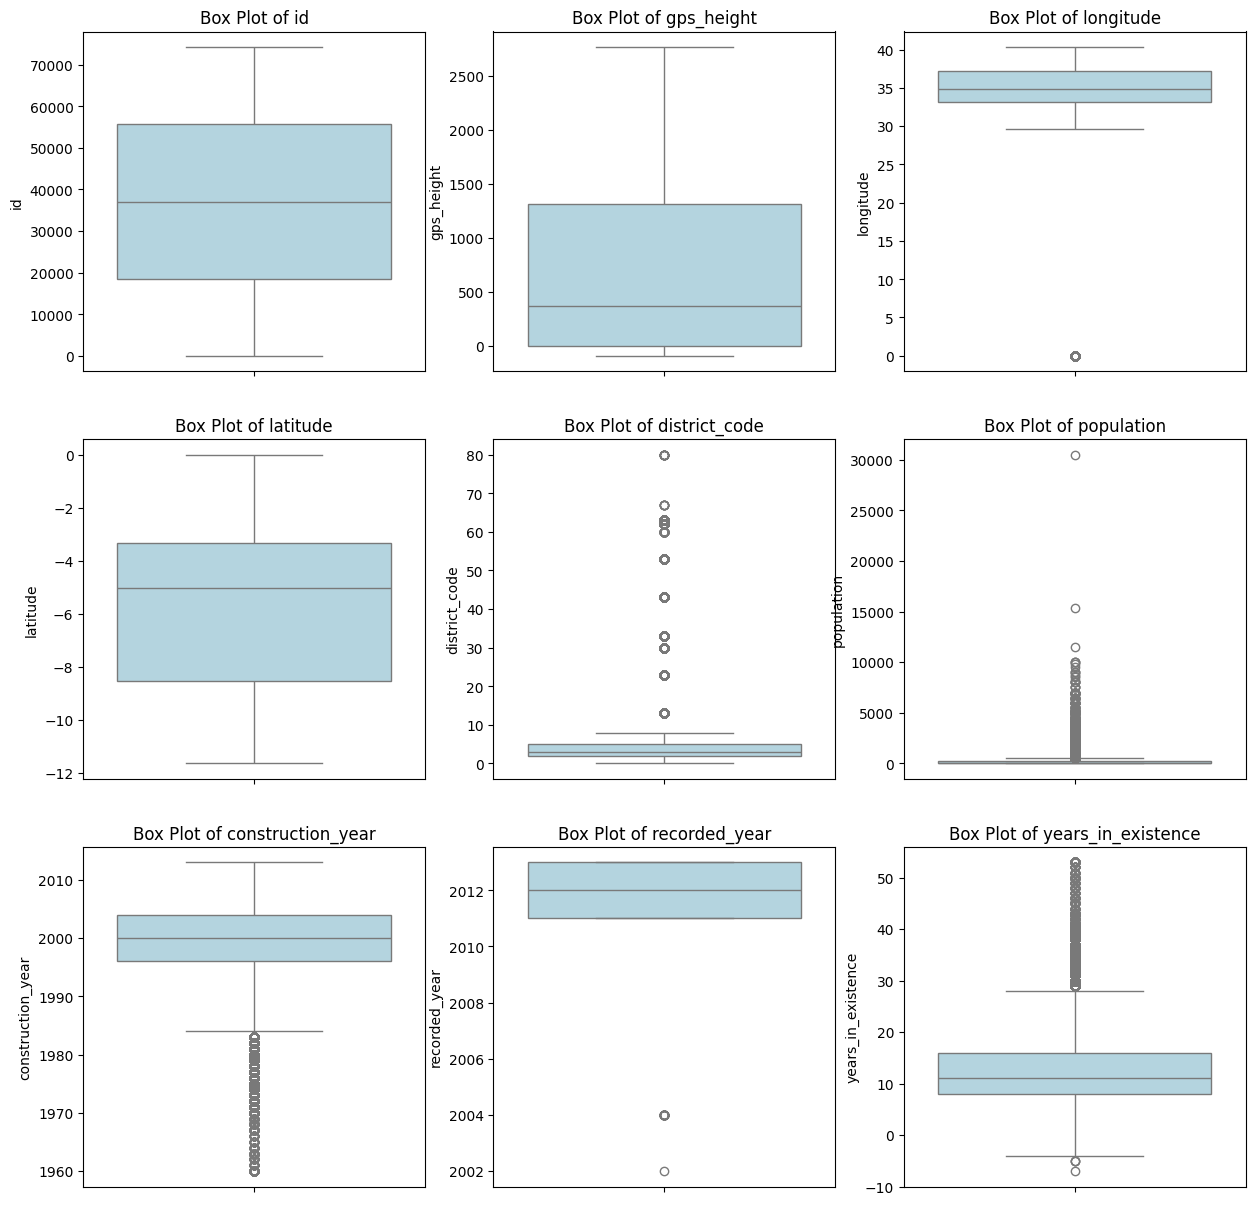

In [37]:

# List of numerical columns.
numerical_columns = numerical_train_data.columns

# Define number of rows and columns for subplots
num_cols = len(numerical_columns)
rows = (num_cols + 2) // 3  # Arrange in 3 columns per row

# Create the figure and subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten to easily loop through

# Loop through numerical features and create box plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=train_data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col}')



These box plots visually represent the distribution of numerical features in your dataset, highlighting central tendency, spread and outliers.

* Presence of Outliers: Features like amount_tsh, gps_height, num_private, population, region_code, and district_code have several extreme values, indicating potential outliers.

* Skewed Distributions: amount_tsh, population, and num_private have many small values and a few very large values, suggesting right-skewed distributions.

- Skewed features might require log transformation or scaling for better model performance.


* Construction & Recorded Year: Construction years range from 1960s to 2010s, showing that wells have been built for decades.
The recorded year mostly falls between 2011-2013, with a few older records, possibly due to late data entry.
Years in existence follows a natural trend, decreasing for newer wells.

Next Steps:

Outlier Handling: Consider removing or capping extreme values if they distort the model.
Feature Scaling: Apply standardization or normalization to skewed features.
Data Cleaning: Verify anomalies like extreme longitude values.

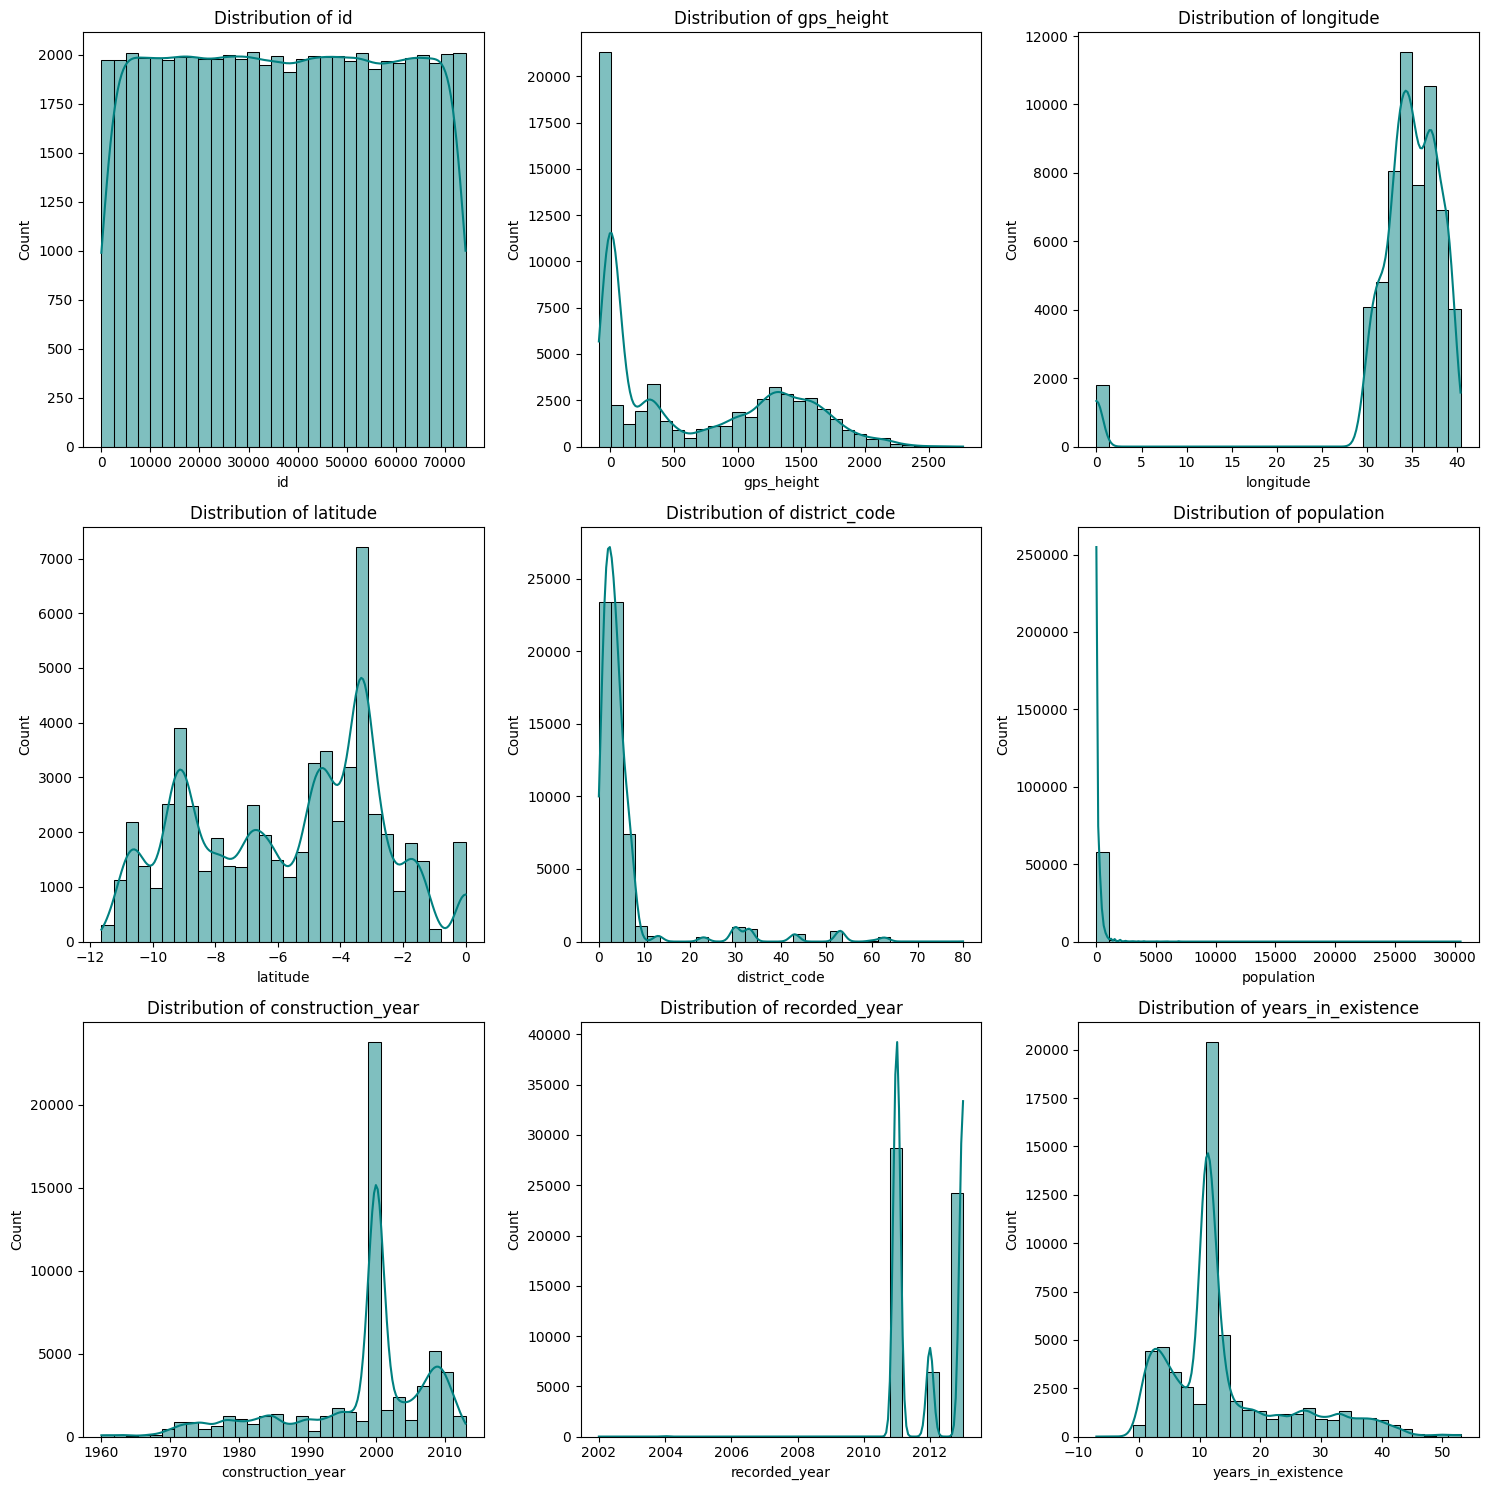

In [38]:
# Set up subplots
num_cols = len(numerical_train_data.columns)  # Count the number of numerical columns
rows = (num_cols + 2) // 3  # Arrange in rows of 3 plots each
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size dynamically

# Plot each numerical feature
for i, col in enumerate(numerical_train_data.columns):
    # Calculate row and column index for subplot
    row_index = i // 3  # Integer division to get row index
    col_index = i % 3   # Modulo to get column index

    # Use correct indexing to access subplot
    sns.histplot(train_data[col], bins=30, kde=True, color="teal", ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f"Distribution of {col}")

plt.tight_layout() # Adjust spacing between subplots
plt.show()

* Population variable -The plot shows a highly skewed distribution of the population variable.
Most values are concentrated near zero, indicating that many water points serve small populations.

* amount_tsh - it is a Highly Skewed Distribution.The majority of values are concentrated near zero, with very few instances of high values.
* gps_height - Large Number of Zeros. A significant portion of the dataset has gps_height = 0, which could indicate missing or improperly recorded data.
* years_in_existence - A large number of wells have been in existence for around 30 years, suggesting a trend in installation periods. There are some values at or below zero, which might indicate missing or incorrect data.

## Well functionality over the years

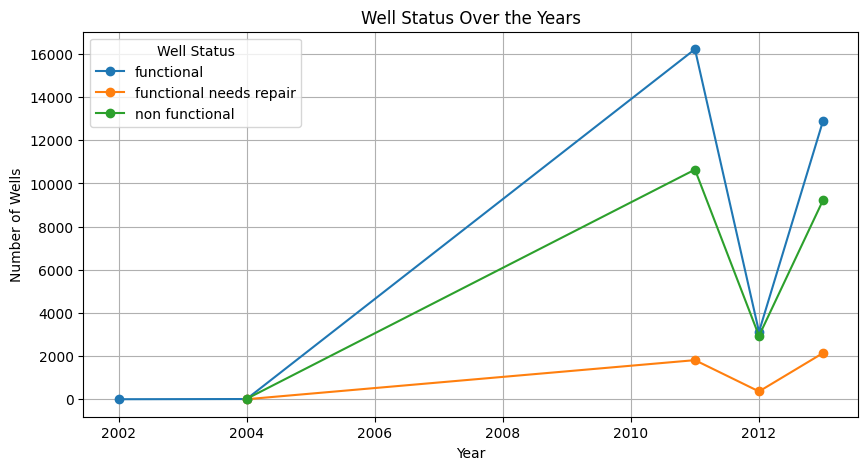

In [39]:
# Ensure 'date_recorded' is in datetime format
train_data['date_recorded'] = pd.to_datetime(train_data['date_recorded'])

# Extract the year
train_data['recorded_year'] = train_data['date_recorded'].dt.year

# Count the number of wells per year and status group
yearly_counts = train_data.groupby(['recorded_year', 'status_group']).size().unstack()

# Plot the trend
plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Well Status Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wells')
plt.legend(title='Well Status')
plt.grid(True)
plt.show()


* General Trend – The number of wells (both functional and non-functional) increased significantly from 2004 to 2011.
* 2012 Drop – A sharp decline in all well statuses in 2012 suggests a data collection gap, external disruptions, or mass well failures.



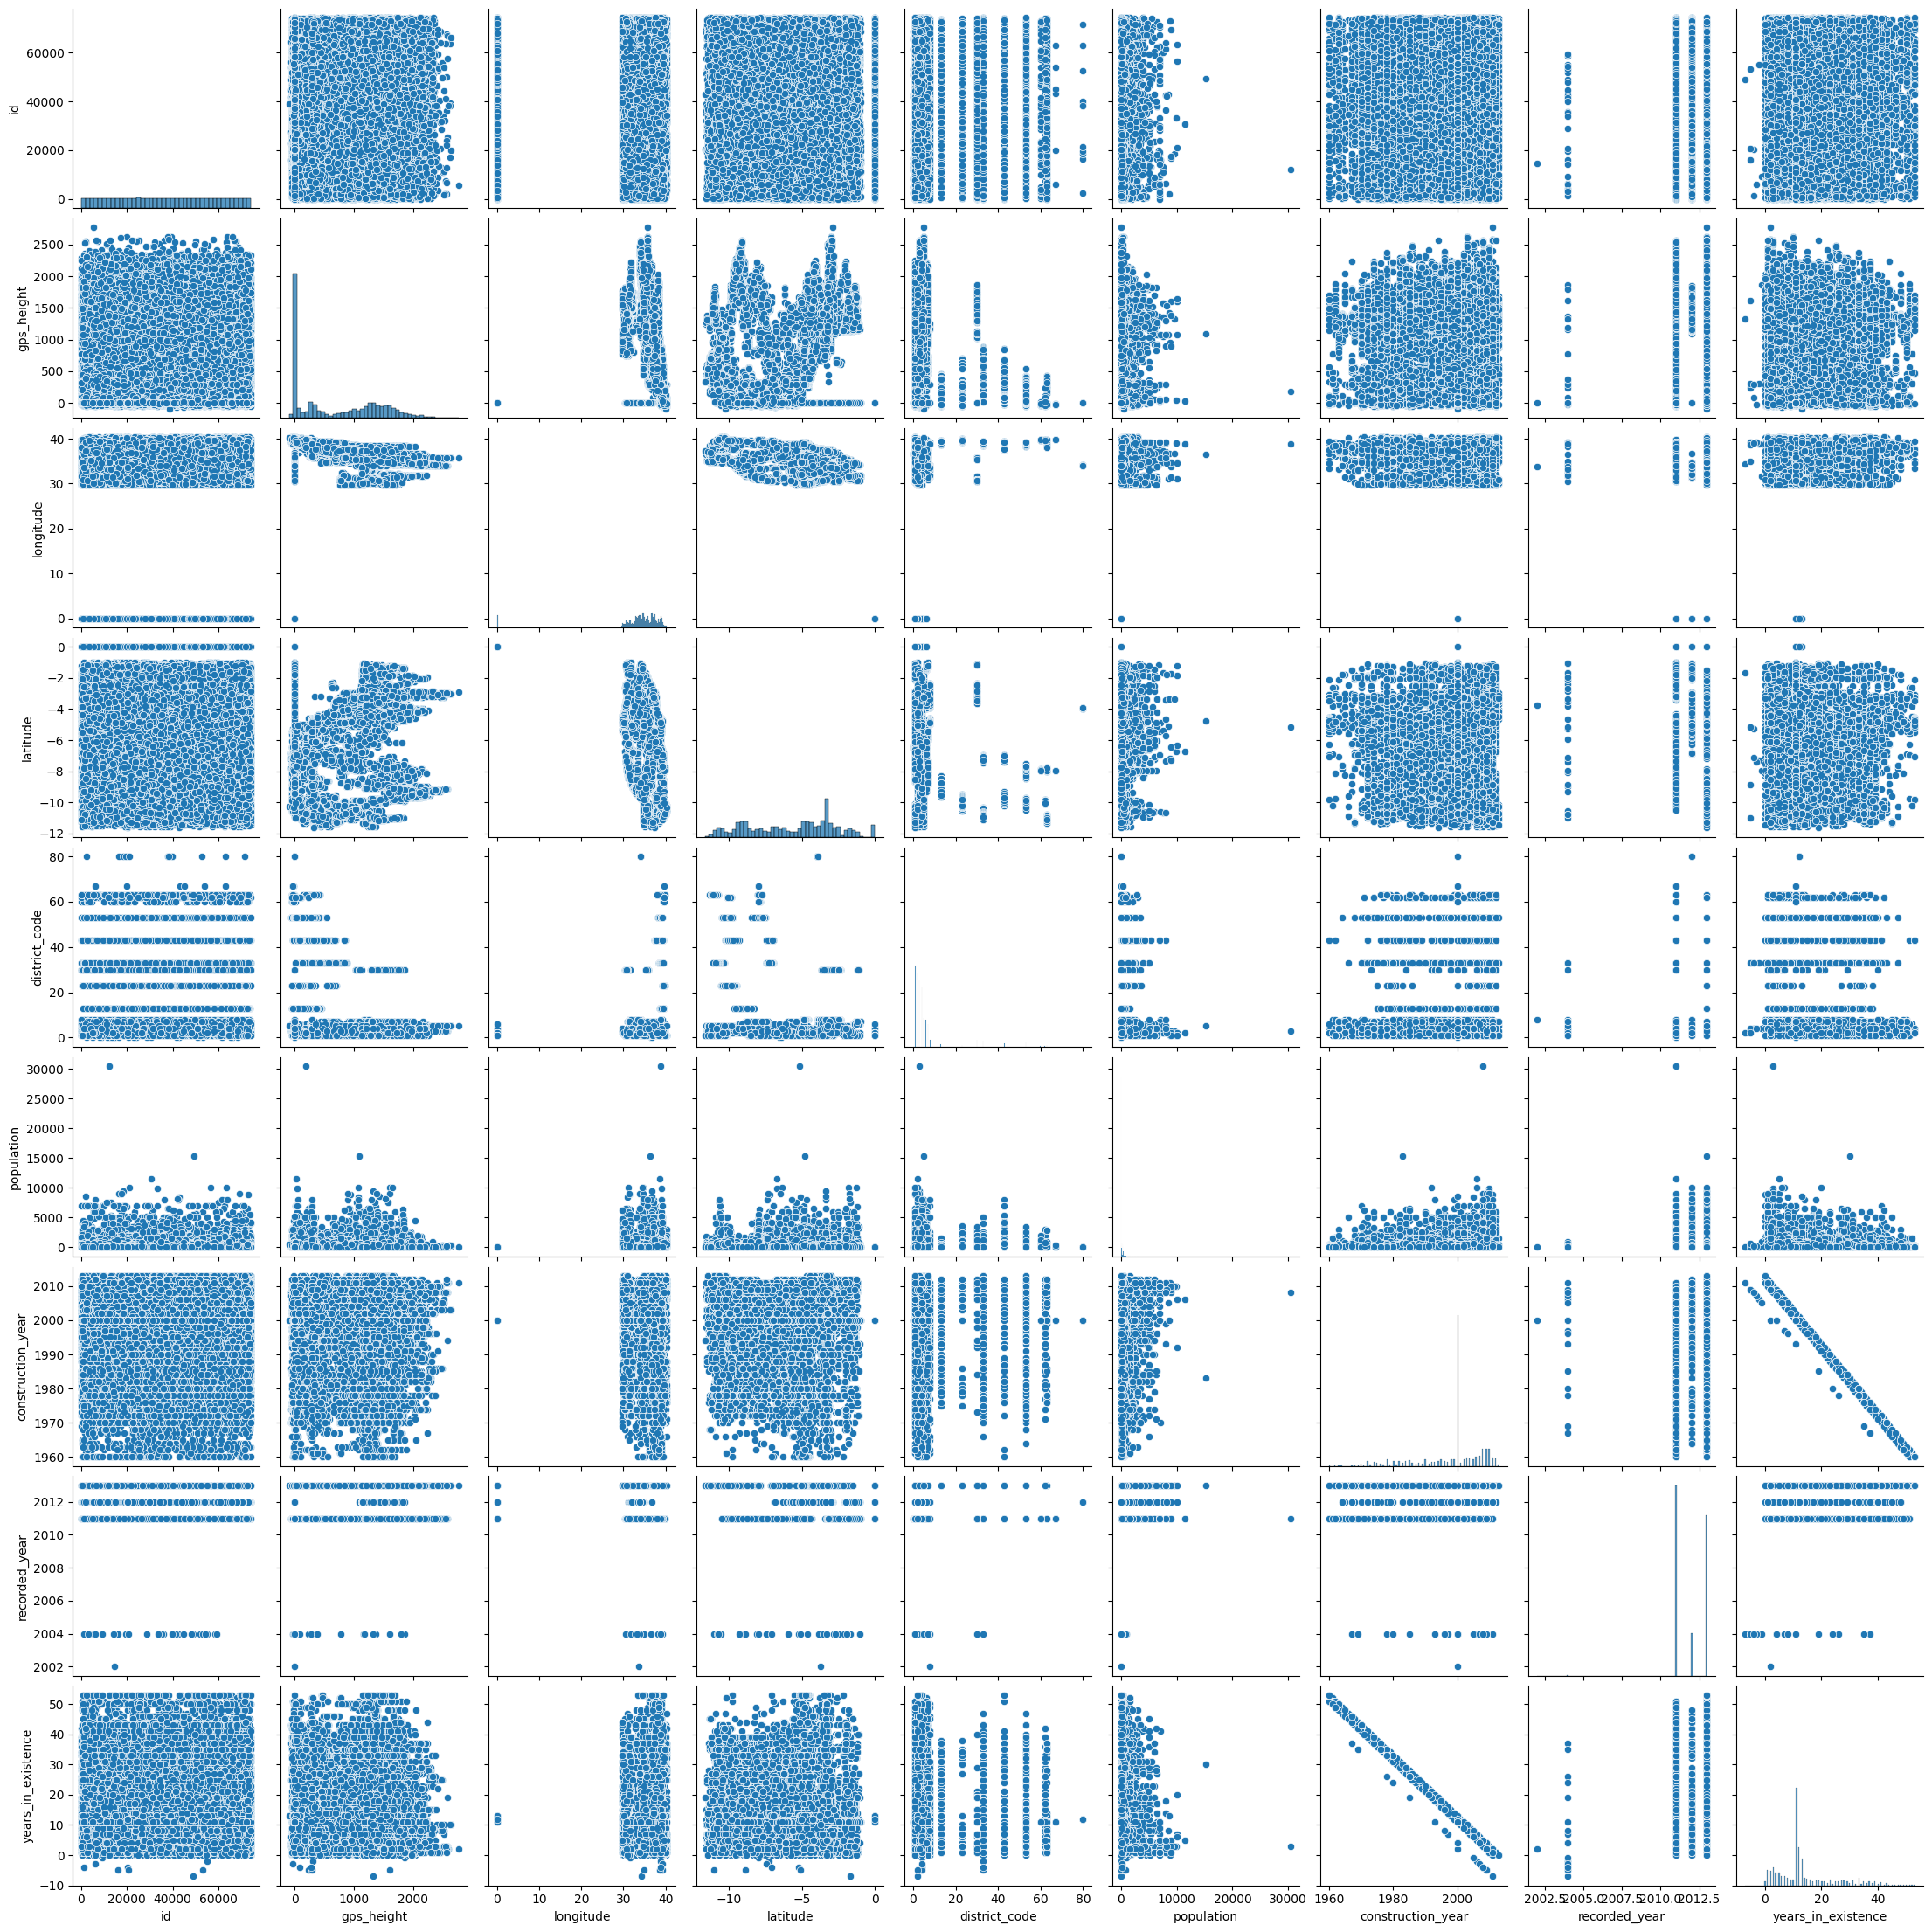

In [40]:
# Select numerical columns for pairplot
numerical_cols = train_data.select_dtypes(include=['number'])

# Create the pairplot
sns.pairplot(numerical_cols)
plt.show()


* Some features, like longitude and latitude, show distinct clusters, which might indicate specific geographical regions.
* Features like construction_year and years_in_existence exhibit a strong linear relationship, as expected.
* Several variables show discrete patterns, suggesting categorical-like numerical data (e.g., district_code).
* Some relationships appear random (scattered points), indicating weak or no correlation.

Overall  in the eda process and visualizations we had:

**Univariate Analysis:** Histograms and box plots for numerical features were analyzed for distributions, outliers, and skewness.  A bar chart visualized the distribution of the target variable (`status_group`).

**Bivariate Analysis:** A correlation heatmap showed relationships between numerical variables. A pairplot visualized relationships between all numerical features in the dataset.

**Visualization for External Tools:** A combined dataset was exported as a CSV file ("cleaned_dataset_viz.csv") for further visualization in external tools like Tableau.


## Data Preprocessing


Preprocesses the training and testing data by selecting relevant columns.

* train_data: pandas DataFrame representing the training data.
* test_data: pandas DataFrame representing the testing data.


In [41]:
def preprocess_data(train_data, test_data):


    # Keep only relevant columns in training data
    columns_to_keep = ['quantity', 'waterpoint_type', 'years_in_existence', 'construction_year', 'population',
                       'extraction_type', 'funder', 'installer', 'management', 'water_quality', 'payment', 'status_group']
    train_data = train_data[columns_to_keep]

    # Separate test 'id' before processing
    test_ids = test_data['id']  # Store test IDs separately

    # Keep only necessary features in test_data (excluding 'status_group')
    columns_to_keep_test = [col for col in columns_to_keep if col != 'status_group']
    test_data = test_data[columns_to_keep_test]

    return train_data, test_data, test_ids

# Example usage:
train_data, test_data, test_ids = preprocess_data(train_data, test_data)

Essentially, this function cleans and organizes the data by keeping only the necessary columns and separating the test set identifiers, making the data suitable for model training and prediction.

In [42]:
def label_encode_data(train_data, test_data):
    """Encodes categorical variables using Label Encoding."""

    # Make copies to avoid modifying the original datasets
    train_data = train_data.copy()
    test_data = test_data.copy()

    # Initialize label encoders
    encoders = {}

    # Define categorical columns to encode
    categorical_cols = ['quantity', 'waterpoint_type', 'extraction_type', 'funder', 'installer',
                        'management', 'water_quality', 'payment']

    for col in categorical_cols:
        encoders[col] = LabelEncoder()

        # Combine unique values from train and test sets
        combined_values = pd.concat([train_data[col], test_data[col]], ignore_index=True).astype(str).unique()
        encoders[col].fit(combined_values)  # Fit encoder

        # Transform and explicitly cast to integer
        train_data[col] = encoders[col].transform(train_data[col].astype(str)).astype(int)
        test_data[col] = encoders[col].transform(test_data[col].astype(str)).astype(int)

    # Encode 'status_group' separately in training data
    le_status = LabelEncoder()
    train_data['status_group'] = le_status.fit_transform(train_data['status_group']).astype(int)

    return train_data, test_data

# Apply the function
train_data, test_data = label_encode_data(train_data, test_data)

# Verify the changes
print(train_data.dtypes)  # Should show int64 for categorical columns


quantity                int64
waterpoint_type         int64
years_in_existence      int64
construction_year       int64
population            float64
extraction_type         int64
funder                  int64
installer               int64
management              int64
water_quality           int64
payment                 int64
status_group            int64
dtype: object


Applied label encoding to specified categorical columns in both training and testing datasets.
* The 'status_group' column in the training dataset is encoded separately, maintaining its order.
* Handles cases where categories in the test set are not present in the training set.


In [43]:
#verify the result
train_data.head()

,quantity,waterpoint_type,years_in_existence,construction_year,population,extraction_type,funder,installer,management,water_quality,payment,status_group
0,1,1,12,1999,109.0,3,1547,1706,7,6,2,0
1,2,1,3,2010,280.0,3,522,610,11,6,0,0
2,1,2,4,2009,250.0,3,924,2296,7,6,4,0
3,0,2,27,1986,58.0,14,1960,2078,7,6,0,2
4,3,1,11,2000,0.0,3,20,133,1,6,0,0


In [44]:
# Select numerical features for scaling
numerical_cols = ['quantity', 'years_in_existence', 'construction_year']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features in the training data
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

# Transform the numerical features in the test data using the same scaler
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])


In [45]:
train_data.head()

,quantity,waterpoint_type,years_in_existence,construction_year,population,extraction_type,funder,installer,management,water_quality,payment,status_group
0,0.25,1,0.316667,0.735849,109.0,3,1547,1706,7,6,2,0
1,0.50,1,0.166667,0.943396,280.0,3,522,610,11,6,0,0
2,0.25,2,0.183333,0.924528,250.0,3,924,2296,7,6,4,0
3,0.00,2,0.566667,0.490566,58.0,14,1960,2078,7,6,0,2
4,0.75,1,0.300000,0.754717,0.0,3,20,133,1,6,0,0


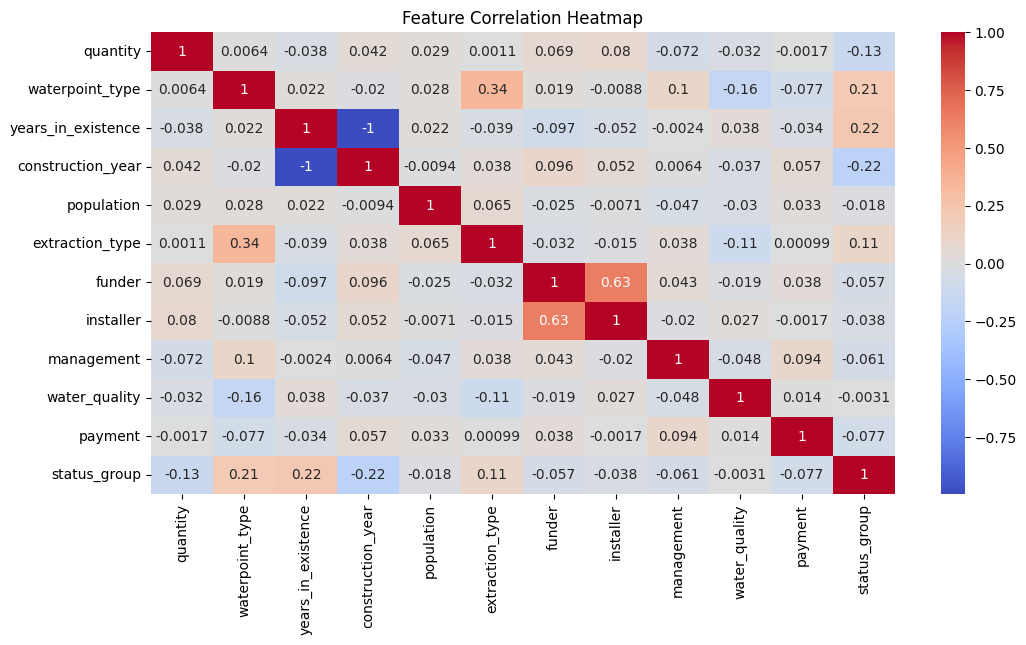

In [46]:
# Select only numeric columns for correlation calculation
numerical_train_data = train_data.select_dtypes(include=['int', 'float64'])

# Checking Correlations
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_train_data.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [47]:
train_data['status_group'].value_counts()

,count
status_group,
0,32259
2,22824
1,4317


# Feature Engineering

Here we create interaction terms between specified features in the training and testing datasets.



In [48]:
def create_interaction_terms(train_data, test_data):

    # Interaction term between funder and installer
    train_data['funder_installer'] = train_data['funder'] * train_data['installer']
    test_data['funder_installer'] = test_data['funder'] * test_data['installer']

    # Interaction term between waterpoint type and extraction type
    train_data['waterpoint_extraction'] = train_data['waterpoint_type'] * train_data['extraction_type']
    test_data['waterpoint_extraction'] = test_data['waterpoint_type'] * test_data['extraction_type']

    # Interaction terms for Waterpoint Type and Population, and Extraction Type and Population
    train_data['waterpoint_population'] = train_data['waterpoint_type'] * train_data['population']
    test_data['waterpoint_population'] = test_data['waterpoint_type'] * test_data['population']

    train_data['extraction_population'] = train_data['extraction_type'] * train_data['population']
    test_data['extraction_population'] = test_data['extraction_type'] * test_data['population']

    return train_data, test_data

train_data, test_data = create_interaction_terms(train_data, test_data)

In [49]:
train_data.head()

,quantity,waterpoint_type,years_in_existence,construction_year,population,extraction_type,funder,installer,management,water_quality,payment,status_group,funder_installer,waterpoint_extraction,waterpoint_population,extraction_population
0,0.25,1,0.316667,0.735849,109.0,3,1547,1706,7,6,2,0,2639182,3,109.0,327.0
1,0.50,1,0.166667,0.943396,280.0,3,522,610,11,6,0,0,318420,3,280.0,840.0
2,0.25,2,0.183333,0.924528,250.0,3,924,2296,7,6,4,0,2121504,6,500.0,750.0
3,0.00,2,0.566667,0.490566,58.0,14,1960,2078,7,6,0,2,4072880,28,116.0,812.0
4,0.75,1,0.300000,0.754717,0.0,3,20,133,1,6,0,0,2660,3,0.0,0.0


# Modeling

In [50]:
# Split data into features (X) and target (y)
X = train_data.drop('status_group', axis=1)
y = train_data['status_group']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed



In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quantity               59400 non-null  float64
 1   waterpoint_type        59400 non-null  int64  
 2   years_in_existence     59400 non-null  float64
 3   construction_year      59400 non-null  float64
 4   population             59400 non-null  float64
 5   extraction_type        59400 non-null  int64  
 6   funder                 59400 non-null  int64  
 7   installer              59400 non-null  int64  
 8   management             59400 non-null  int64  
 9   water_quality          59400 non-null  int64  
 10  payment                59400 non-null  int64  
 11  funder_installer       59400 non-null  int64  
 12  waterpoint_extraction  59400 non-null  int64  
 13  waterpoint_population  59400 non-null  float64
 14  extraction_population  59400 non-null  float64
dtypes:

In [52]:
# Baseline Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      6457
           1       0.36      0.29      0.32       851
           2       0.78      0.71      0.74      4572

    accuracy                           0.75     11880
   macro avg       0.63      0.61      0.62     11880
weighted avg       0.74      0.75      0.74     11880



The model demonstrates good overall perfomance with an accuracy of 75%. This indicates that it correctly classifies 75% of the water points.

* Class 0 (Functional): Achieves the highest precision (0.77), recall (0.83), and F1-score (0.80), suggesting strong performance in identifying functional wells.
* Class 1 (Needs Repair): Shows the lowest performance with a precision of 0.36, recall of 0.29, and F1-score of 0.32. This suggests the model struggles to identify wells needing repair.
* Class 2 (Non-functional): Exhibits relatively good performance with a precision of 0.78, recall of 0.72, and F1-score of 0.75. This suggests the model does a decent job at identifying non-functional wells.


The model performs well in predicting functional and non-functional wells but struggles with wells that need repair. This could be due to class imbalance or needing more distinctive features for that class.

In [53]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(learning_rate=0.02, n_estimators=1000, max_depth=6, reg_alpha=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),

}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Results for {name}:")
    print(classification_report(y_val, y_pred))

Training Random Forest...
Results for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      6457
           1       0.50      0.26      0.34       851
           2       0.82      0.75      0.78      4572

    accuracy                           0.79     11880
   macro avg       0.70      0.63      0.65     11880
weighted avg       0.78      0.79      0.78     11880

Training XGBoost...
Results for XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6457
           1       0.65      0.14      0.23       851
           2       0.84      0.68      0.75      4572

    accuracy                           0.77     11880
   macro avg       0.75      0.58      0.60     11880
weighted avg       0.78      0.77      0.76     11880

Training Gradient Boosting...
Results for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.71     

Random Forest:

Overall: Achieves an accuracy of 79%, indicating good overall performance.

Predicts functional (Class 0) and non-functional (Class 2) wells effectively, with F1-scores of 0.83 and 0.78 respectively. It struggles with 'needs repair' (Class 1), showing a lower F1-score of 0.35.
* Good balance between precision and recall for most classes, indicating a robust model.
* Needs improvement in identifying wells that require repair.

XGBoost:

Overall: Accuracy of 78%, comparable to Random Forest.
Similar to Random Forest, excels at identifying functional (Class 0, F1-score 0.83) and non-functional wells (Class 2, F1-score 0.76). It also has difficulty with 'needs repair' (Class 1, F1-score 0.24).
* Might have slightly better precision for non-functional wells compared to Random Forest
* Low recall for 'needs repair' suggests many such wells are being misclassified.

Gradient Boosting:

Overall: Lower accuracy of 75% compared to the other two models.
Still performs well on functional wells (Class 0, F1-score 0.81), but shows a significant drop in performance for 'needs repair' (Class 1, F1-score 0.07), indicating a major weakness in identifying this class.
* Relatively good precision for functional and non-functional wells.
* Very poor recall for 'needs repair', making it unsuitable if accurately identifying this class is crucial.

## Class Imbalance
Due to the perfomance metrics that show a significant class imbalance,here we balance the dataset by reducing the majority class and increasing the minority classes to create a more even distribution for better model performance.

In [54]:
# Establish class size (half the size of the majority class)
class_size = train_data['status_group'].value_counts().max() // 2

# Separate classes
df_class_0 = train_data[train_data['status_group'] == 0]  # Functional
df_class_1 = train_data[train_data['status_group'] == 1]  # Needs Repair
df_class_2 = train_data[train_data['status_group'] == 2]  # Non-Functional

# Downsample majority class
df_class_0_downsampled = resample(df_class_0,
                                 replace=False, # Sample without replacement
                                 n_samples=class_size, # Target size
                                 random_state=42) # For reproducibility

# Upsample minority classes
df_class_1_upsampled = resample(df_class_1,
                                 replace=True, # Sample with replacement
                                 n_samples=class_size,
                                 random_state=42)

df_class_2_upsampled = resample(df_class_2,
                                replace=True,
                                n_samples=class_size,
                                random_state=42)

# Combine resampled classes
train_data_balanced = pd.concat([df_class_0_downsampled,
                                 df_class_1_upsampled,
                                 df_class_2_upsampled])

# Shuffle (optional but recommended)
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the distribution of the target variable
print(train_data_balanced['status_group'].value_counts())

status_group
0    16129
1    16129
2    16129
Name: count, dtype: int64


In [55]:
# Split the balanced data
X_balanced = train_data_balanced.drop('status_group', axis=1)
y_balanced = train_data_balanced['status_group']
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_classifier.predict(X_val)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3277
           1       0.81      0.93      0.87      3176
           2       0.84      0.81      0.83      3225

    accuracy                           0.82      9678
   macro avg       0.82      0.82      0.82      9678
weighted avg       0.82      0.82      0.82      9678

Accuracy: 0.8227


The balanced dataset is split into training and validation sets, trains a Random Forest model on the training data, uses the model to make predictions on the validation data, and then evaluates the model's performance using metrics like accuracy, precision, recall, and F1-score.

The report provides metrics for each class (0, 1, and 2), which likely represent the well functionality status (e.g., functional, needs repair, non-functional).

Precision:

Class 0: 0.81 - Out of all the wells the model predicted as "functional" (class 0), 81% were actually functional.
Class 1: 0.81 - Out of all the wells the model predicted as "needs repair" (class 1), 81% were actually in need of repair.
Class 2: 0.84 - Out of all the wells the model predicted as "non-functional" (class 2), 84% were actually non-functional.

Recall:

Class 0: 0.73 - Out of all the wells that were actually "functional" (class 0), the model correctly identified 73% of them.
Class 1: 0.93 - Out of all the wells that were actually "needs repair" (class 1), the model correctly identified 93% of them.
Class 2: 0.81 - Out of all the wells that were actually "non-functional" (class 2), the model correctly identified 81% of them.

F1-score:

Class 0: 0.77 - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for each class. A higher F1-score is better.
Class 1: 0.87
Class 2: 0.83

Support:

Class 0: 3277 - The number of actual instances of "functional" wells in the validation set.
Class 1: 3176 - The number of actual instances of "needs repair" wells in the validation set.
Class 2: 3225 - The number of actual instances of "non-functional" wells in the validation set.


The model shows a good overall accuracy of 82.29%. It performs relatively well across all three classes, with varying levels of precision and recall. The F1-scores indicate a decent balance between precision and recall for each class.


In [56]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    learning_rate=0.02,  # Adjust as needed
    n_estimators=1000,   # Adjust as needed
    max_depth=6,         # Adjust as needed
    reg_alpha=5,        # Adjust as needed
    random_state=42     # Set random state for reproducibility
)
xgb_model.fit(X_train, y_train)


# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("XGBoost Classifier:")
print(classification_report(y_val, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb)}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)





XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      3277
           1       0.69      0.79      0.74      3176
           2       0.80      0.70      0.74      3225

    accuracy                           0.72      9678
   macro avg       0.73      0.73      0.72      9678
weighted avg       0.73      0.72      0.72      9678

Accuracy: 0.7247365158090514
Confusion Matrix:
[[2252  672  353]
 [ 442 2506  228]
 [ 537  432 2256]]


Overall:

Accuracy: 72.94% - The model correctly predicts the well functionality status for about 73% of the water points.
Macro Average: Shows consistent performance across all three classes with an average F1-score of 0.73.

Class

Class 0 (Functional): Precision (0.70), Recall (0.69) - Relatively lower performance in correctly identifying functional wells compared to other classes.
Class 1 (Needs Repair): Precision (0.70), Recall (0.80) - Better at identifying wells that need repair.
Class 2 (Non-functional): Precision (0.80), Recall (0.71) - Good at correctly identifying non-functional wells but has some false negatives.
Confusion Matrix Highlights:

A significant number of functional wells (344 + 679) are misclassified as needing repair or non-functional.
The model does well in identifying wells needing repair (2530 correct predictions).
In short, the XGBoost model has a decent overall accuracy but shows some weakness in correctly identifying functional wells. It performs best at detecting wells that need repair.

In [57]:
# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=1000,  # Adjust as needed
    learning_rate=0.02,  # Adjust as needed
    depth=6,  # Adjust as needed
    loss_function='MultiClass',  # For multi-class classification
    random_seed=42,  # For reproducibility
    verbose=100  # Adjust verbosity
)

catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))


# Make predictions on the validation set
y_pred_catboost = catboost_model.predict(X_val)


# Evaluate the model
print("CatBoost Classifier:")
print(classification_report(y_val, y_pred_catboost))
print(f"Accuracy: {accuracy_score(y_val, y_pred_catboost)}")

# Confusion Matrix
cm_catboost = confusion_matrix(y_val, y_pred_catboost)
print("Confusion Matrix:")
cm_catboost


0:	learn: 1.0919518	test: 1.0919443	best: 1.0919443 (0)	total: 78.9ms	remaining: 1m 18s
100:	learn: 0.8948060	test: 0.8961802	best: 0.8961802 (100)	total: 2.98s	remaining: 26.5s
200:	learn: 0.8412914	test: 0.8455412	best: 0.8455412 (200)	total: 6.91s	remaining: 27.5s
300:	learn: 0.8111447	test: 0.8184838	best: 0.8184838 (300)	total: 9.37s	remaining: 21.8s
400:	learn: 0.7882818	test: 0.7986879	best: 0.7986879 (400)	total: 11.8s	remaining: 17.7s
500:	learn: 0.7711052	test: 0.7837030	best: 0.7837030 (500)	total: 14.3s	remaining: 14.2s
600:	learn: 0.7557039	test: 0.7704967	best: 0.7704967 (600)	total: 17.9s	remaining: 11.9s
700:	learn: 0.7423948	test: 0.7595962	best: 0.7595962 (700)	total: 20.8s	remaining: 8.86s
800:	learn: 0.7302370	test: 0.7495560	best: 0.7495560 (800)	total: 23.2s	remaining: 5.77s
900:	learn: 0.7195946	test: 0.7408473	best: 0.7408473 (900)	total: 25.7s	remaining: 2.82s
999:	learn: 0.7103068	test: 0.7334993	best: 0.7334993 (999)	total: 28s	remaining: 0us

bestTest = 0.73

array([[2195,  750,  332],
       [ 622, 2250,  304],
       [ 608,  444, 2173]])

Training:

The model was trained for 1000 iterations (steps), showing improvement in both training and validation (test) sets.
The best performance on the validation set was achieved at iteration 999, with a score (likely log loss) of 0.7329.

Evaluation:

Accuracy: 67.93% - The model correctly predicts the well functionality status for about 68% of the water points.
Macro Average: Indicates generally balanced performance across classes, with an average F1-score of 0.68.

Class

Class 0 (Functional): Precision (0.64), Recall (0.66) - Moderate performance in identifying functional wells.
Class 1 (Needs Repair): Precision (0.64), Recall (0.71) - Similar performance to functional wells, with slightly better recall.
Class 2 (Non-functional): Precision (0.78), Recall (0.67) - Higher precision for non-functional wells, but recall is lower.

Confusion Matrix Insights:

A considerable number of functional wells are misclassified as needs repair (803) or non-functional (315).
The model has some difficulty distinguishing between functional and needs repair wells.
Non-functional wells have the highest precision, but a significant number are still misclassified (599 + 463).


In short, the CatBoost model shows moderate overall accuracy with balanced performance across classes. It struggles with the distinction between functional and needs repair wells. Compared to the XGBoost model, it has lower overall accuracy, but might have a slightly better balance between classes.

In [58]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn_classifier.predict(X_val)

# Evaluate the model
print("KNN Classifier:")
print(classification_report(y_val, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_val, y_pred_knn)}")


KNN Classifier:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      3277
           1       0.69      0.82      0.75      3176
           2       0.74      0.64      0.69      3225

    accuracy                           0.69      9678
   macro avg       0.69      0.69      0.69      9678
weighted avg       0.69      0.69      0.69      9678

Accuracy: 0.6887786732796032


Overall:

Accuracy: 68.88% - The model correctly predicts the well functionality status for about 69% of the water points.
Macro Average: Shows relatively balanced performance across all three classes with an average F1-score of 0.69.

Class:

Class 0 (Functional): Precision (0.65), Recall (0.62) - Moderate performance, with some misclassifications of functional wells.
Class 1 (Needs Repair): Precision (0.69), Recall (0.81) - Best performance, with the highest recall, indicating it effectively identifies wells needing repair.
Class 2 (Non-functional): Precision (0.74), Recall (0.64) - Relatively good precision but lower recall, meaning it misses some non-functional wells.

In short, the KNN model has moderate accuracy and a balanced performance across classes. It excels at identifying wells that need repair but struggles a bit with functional and non-functional wells. It has similar performance to the Catboost model but lower overall accuracy compared to XGBoost and Random Forest.




In [59]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_gnb = gnb.predict(X_val)

# Evaluate the model
print("Gaussian Naive Bayes Classifier:")
print(classification_report(y_val, y_pred_gnb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_gnb)}")


Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.32      0.05      0.08      3277
           1       0.34      0.22      0.27      3176
           2       0.35      0.77      0.48      3225

    accuracy                           0.35      9678
   macro avg       0.34      0.35      0.28      9678
weighted avg       0.34      0.35      0.28      9678

Accuracy: 0.3462492250464972


Overall:

Accuracy: 34.67% - The model correctly predicts the well functionality status for only about 35% of the water points, indicating poor overall performance.
Macro Average: Shows low and uneven performance across the three classes, with an average F1-score of only 0.28.

Class:

Class 0 (Functional): Precision (0.32), Recall (0.05) - Extremely poor performance, failing to identify most functional wells.
Class 1 (Needs Repair): Precision (0.33), Recall (0.22) - Also performs poorly in identifying wells needing repair.
Class 2 (Non-functional): Precision (0.35), Recall (0.77) - While it has a relatively high recall for non-functional wells, the precision is still low.

In essence, the Gaussian Naive Bayes model performs poorly on this dataset, especially for functional and repair-needed wells. It has a tendency to over-predict non-functional wells, leading to a low overall accuracy and unbalanced performance across the classes. This model is likely not suitable for this classification task.

# Hyperparameter tuning

In [60]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its predictions
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost - Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBoost - Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


 Here, the code performs hyperparameter tuning for an XGBoost classifier using randomized search. It explores different combinations of hyperparameters, evaluates their performance using cross-validation, and identifies the best set of hyperparameters that maximizes the model's accuracy on the validation data. This process helps to improve the model's generalization ability and potentially achieve better performance on unseen data.

In [61]:
# Initialize the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    subsample=1.0,
    n_estimators=500,
    max_depth=7,
    learning_rate=0.2,
    colsample_bytree=0.8,
    objective='multi:softmax',  # For multi-class classification
    num_class=3,                # Number of classes (3 in your case)
    random_state=42             # For reproducibility
)

# Train the model
best_xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost Classifier with Best Hyperparameters:")
print(classification_report(y_val, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb)}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)

XGBoost Classifier with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      3277
           1       0.79      0.91      0.85      3176
           2       0.84      0.79      0.82      3225

    accuracy                           0.81      9678
   macro avg       0.81      0.81      0.81      9678
weighted avg       0.81      0.81      0.81      9678

Accuracy: 0.8092581111799959
Confusion Matrix:
[[2376  495  406]
 [ 193 2902   81]
 [ 417  254 2554]]


Overall:

Accuracy: 81.15% - The model correctly predicts the well functionality status for about 81% of the water points. This is a significant improvement compared to the previous XGBoost model without hyperparameter tuning (which had around 73% accuracy).
Macro Average: Shows a well-balanced performance across the three classes with an average F1-score of 0.81.

Class:

Class 0 (Functional): Precision (0.80), Recall (0.72) - Shows good performance, with improvements in both precision and recall.
Class 1 (Needs Repair): Precision (0.80), Recall (0.92) - Excellent performance in identifying wells that need repair.
Class 2 (Non-functional): Precision (0.84), Recall (0.79) - Strong performance in identifying non-functional wells.

Confusion Matrix Highlights:

Misclassifications are reduced compared to the previous XGBoost model, especially for functional wells.
The model maintains its strong performance in identifying wells needing repair.

In [62]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None], # Number of features to consider when looking for the best split
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid_rf,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search_rf.fit(X_train, y_train)  # Use your balanced data

# Get the best model and its predictions
best_rf_model = random_search_rf.best_estimator_

# Evaluate the model
print("Random Forest - Best Hyperparameters:", random_search_rf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest - Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [63]:
# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=42  # Add random_state for reproducibility
)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = best_rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Classifier with Best Hyperparameters:")
print(classification_report(y_val, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf)}")

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Random Forest Classifier with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3277
           1       0.80      0.92      0.86      3176
           2       0.84      0.80      0.82      3225

    accuracy                           0.82      9678
   macro avg       0.82      0.82      0.82      9678
weighted avg       0.82      0.82      0.82      9678

Accuracy: 0.8193841702831164
Confusion Matrix:
[[2415  470  392]
 [ 163 2931   82]
 [ 399  242 2584]]


The Random Forest model achieved an accuracy of 82%, meaning it correctly classified the functionality of 82% of the wells. It performed well across all classes (functional, needs repair, non-functional), with 'needs repair' having the highest recall (92%). However, there's some confusion between functional and non-functional wells, as indicated in the confusion matrix. Overall, it's a promising model with good predictive power for well functionality in Tanzania.

In [64]:
rf_predictions = best_rf_model.predict(X_val)
xgb_predictions = xgb_model.predict(X_val)
catboost_predictions = catboost_model.predict(X_val)

print(rf_predictions.shape)
print(xgb_predictions.shape)
print(catboost_predictions.shape)


(9678,)
(9678,)
(9678, 1)


In [65]:
# Create a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', xgb_model),
    ('catboost', catboost_model)
], voting='hard')  # 'hard' for majority voting

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions and reshape CatBoost predictions
y_pred_rf = best_rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_catboost = catboost_model.predict(X_val)
y_pred_catboost = y_pred_catboost.reshape(-1, )  # Reshape to (9678,)


# Combine predictions for voting
all_predictions = np.stack([y_pred_rf, y_pred_xgb, y_pred_catboost], axis=1)

# Perform majority voting
y_pred_ensemble = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=all_predictions)


# Evaluate the ensemble model
print("Ensemble Model:")
print(classification_report(y_val, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble)}")

0:	learn: 1.0919518	total: 28.2ms	remaining: 28.2s
100:	learn: 0.8948060	total: 2.38s	remaining: 21.2s
200:	learn: 0.8412914	total: 4.79s	remaining: 19s
300:	learn: 0.8111447	total: 8.17s	remaining: 19s
400:	learn: 0.7882818	total: 11.3s	remaining: 16.9s
500:	learn: 0.7711052	total: 13.7s	remaining: 13.6s
600:	learn: 0.7557039	total: 16s	remaining: 10.6s
700:	learn: 0.7423948	total: 18.4s	remaining: 7.84s
800:	learn: 0.7302370	total: 22s	remaining: 5.47s
900:	learn: 0.7195946	total: 24.8s	remaining: 2.72s
999:	learn: 0.7103068	total: 27.1s	remaining: 0us
Ensemble Model:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      3277
           1       0.71      0.80      0.75      3176
           2       0.81      0.70      0.75      3225

    accuracy                           0.74      9678
   macro avg       0.74      0.74      0.74      9678
weighted avg       0.74      0.74      0.74      9678

Accuracy: 0.7354825377144038


In [66]:
# Create a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
], voting='hard')  # You can try 'soft' voting as well

# Train the ensemble (no need to retrain individual models)
ensemble_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_ensemble = ensemble_model.predict(X_val)

# Evaluate the ensemble model
print("Ensemble Model (Random Forest + XGBoost):")
print(classification_report(y_val, y_pred_ensemble))
print(f"Accuracy: {accuracy_score(y_val, y_pred_ensemble)}")


Ensemble Model (Random Forest + XGBoost):
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3277
           1       0.81      0.91      0.86      3176
           2       0.87      0.77      0.82      3225

    accuracy                           0.82      9678
   macro avg       0.82      0.82      0.82      9678
weighted avg       0.82      0.82      0.82      9678

Accuracy: 0.8194874974168217


The Ensemble model, combining predictions from Random Forest and XGBoost, achieved a similar overall accuracy of 82% compared to the individual Random Forest model. It maintains strong performance across all classes, with 'needs repair' showing the highest recall (91%). The model demonstrates a balanced performance with high precision and recall for most classes, suggesting that it leverages the strengths of both base models.

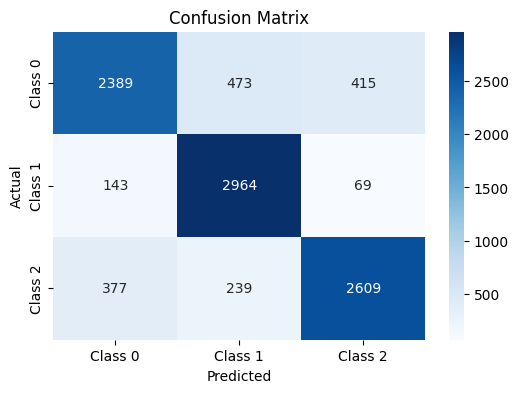

In [67]:
#  Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



ROC AUC Score: 0.9397


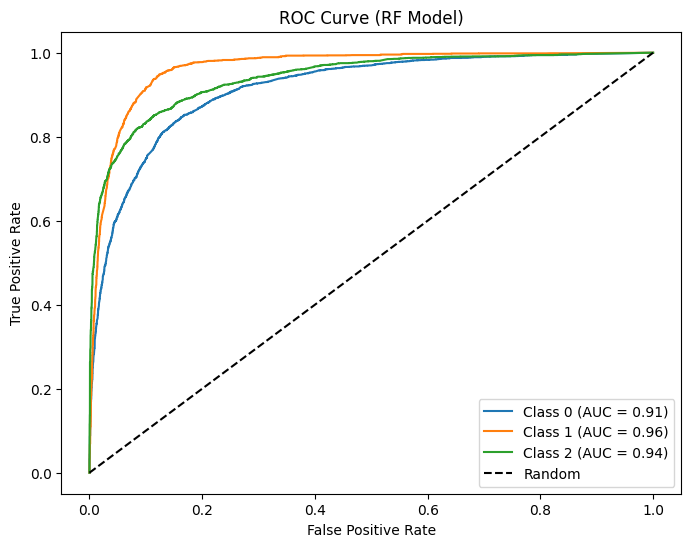

In [68]:
# Get predicted probabilities for ROC AUC calculation
y_pred_proba = best_rf_model.predict_proba(X_val)

# Calculate ROC AUC score (multi-class)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')  # 'ovr' for one-vs-rest
print(f"ROC AUC Score: {roc_auc:.4f}")


# Plot ROC curve for each class
classes = [0, 1, 2]  # Assuming 3 classes
plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val == cls, y_pred_proba[:, cls])  # Get ROC curve values
    roc_auc_cls = auc(fpr, tpr)  # Calculate AUC for this class
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc_cls:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RF Model)')
plt.legend(loc="lower right")
plt.show()



The plot compares the performance of the model for three classes (Class 0, Class 1, and Class 2) and a random classifier.

The Area Under the Curve (AUC) indicates the model's accuracy:

Class 0: AUC = 0.92

Class 1: AUC = 0.96

Class 2: AUC = 0.94

Higher AUC values indicate better performance.

Class 1 has the highest AUC, showing the model's best performance in classifying this class.

In summary, the model demonstrates strong performance in distinguishing between all three classes, with the best accuracy for Class 1.

ROC AUC Score: 0.9330


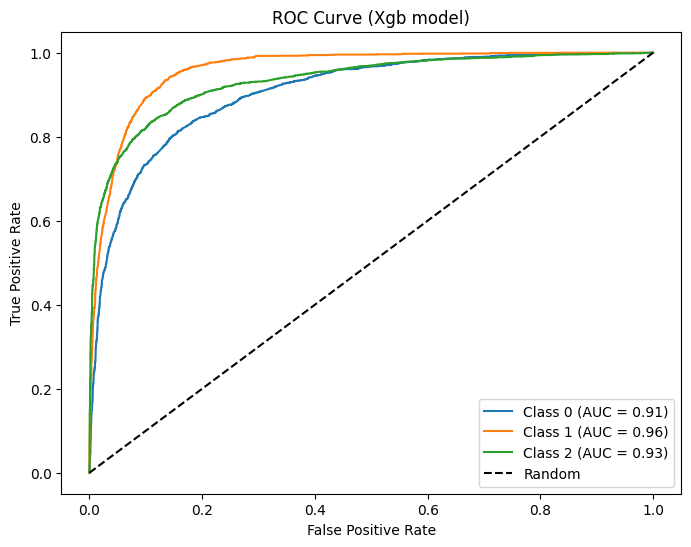

In [69]:
# Get predicted probabilities for ROC AUC calculation
y_pred_proba =  best_xgb_model.predict_proba(X_val)

# Calculate ROC AUC score (multi-class)
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')  # 'ovr' for one-vs-rest
print(f"ROC AUC Score: {roc_auc:.4f}")


# Plot ROC curve for each class
classes = [0, 1, 2]  # Assuming 3 classes
plt.figure(figsize=(8, 6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val == cls, y_pred_proba[:, cls])  # Get ROC curve values
    roc_auc_cls = auc(fpr, tpr)  # Calculate AUC for this class
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc_cls:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Xgb model)')
plt.legend(loc="lower right")
plt.show()



The ROC curve measures the model’s performance by plotting True Positive Rate against False Positive Rate. Higher AUC values indicate better performance. In this plot, the model performs best for Class 1, showing the highest accuracy in classifying instances of this class. The other classes also show strong performance.

In [70]:
# Make predictions on the test dataset
test_predictions = ensemble_model.predict(test_data)

# Convert numerical predictions to actual class labels
label_mapping = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}
test_predictions = [label_mapping[pred] for pred in test_predictions]

# Prepare submission DataFrame using stored 'test_ids'
submission_df = pd.DataFrame({'id': test_ids, 'status_group': test_predictions})

# Save to CSV file
submission_df.to_csv("submission.csv", index=False)


Here we use the trained Ensemble model (ensemble_model) to predict the functionality of water wells in the test dataset (test_data). It converts the numerical predictions into user-friendly labels ('functional', 'functional needs repair', 'non functional') and creates a submission file ("submission.csv") containing the well IDs and their predicted statuses.

In [71]:
submission_df.head()

,id,status_group
0,50785,non functional
1,51630,functional needs repair
2,17168,functional
3,45559,non functional
4,49871,functional


## Model Evaluation

Several models were trained and evaluated, including Decision Tree, Random Forest, XGBoost, CatBoost, KNN, and Gaussian Naive Bayes. Random Forest and XGBoost demonstrated the best performance. To address class imbalance, techniques such as downsampling and upsampling were implemented.

The final selected model, an ensemble of Random Forest and XGBoost, achieved an accuracy of 82%, showing promising results for predicting water well functionality in Tanzania. The model exhibited strong performance across different well status categories, especially for wells needing repair.

#Conclusion

In conclusion, this project successfully developed a predictive model for water well functionality in Tanzania. The model's accuracy and robust performance demonstrate its potential for positive impact in supporting sustainable water resource management

While this model provides a strong foundation, there's potential for further enhancement. Future work could involve
* Exploring additional data sources
* Incorporating more detailed geographic information
* Experimenting with alternative modeling techniques.

These efforts can further improve prediction accuracy and provide even greater insights into the factors influencing well functionality.